In [2]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Midterms and Section Scores

In [3]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [67]:
!git pull

Already up to date.


In [4]:
# Look at the data by section
# How many students are in each section
scores.group('Section')
# What was the average score in each section?


Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [27]:
scores.group('Section',np.sum).show(14)

Section,Midterm sum
1,499
2,484
3,369
4,443
5,576
6,481
7,399
8,473
9,437
10,518


In [30]:
(13*27)/27

13.0

### Possible Hypotheses

- **Null**: The Section 3 average is like the average of the *same number* of random scores from the class.
- **Alternative**: No, the Section 3 average is too low.

In [15]:
# observed statistic
obs_av = 13.6667
# #students in section 3
students = 27
np.mean(scores.sample(students, with_replacement=False).column(1))

16.14814814814815

In [ ]:
np.average(scores.sample(students, with_replacement=False).column('Midterm'))

In [16]:
# Sample from the scores repetitions times and save the average scores in averages
averages = make_array()
repetitions = 50000
for i in np.arange(repetitions):
    averages = np.append(averages, np.average(scores.sample(students, with_replacement=False).column('Midterm')))


In [19]:
np.average(averages)

15.492010370370371

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


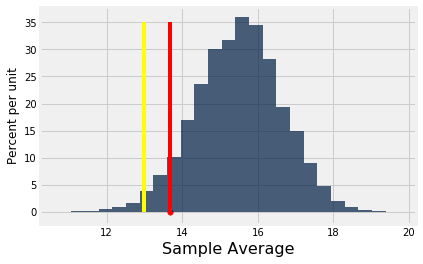

In [25]:
np.average(averages)
# Plot the Random sample average with 25 bins
Table().with_column('Sample Average',averages).hist(bins = 25)
# Add a point with the observed statistic (average from Section 3)
plots.scatter(obs_av, 0, s=30, color='red')
plots.plot([obs_av,obs_av], [0, .35], color ='red')
plots.plot([13.0,13.0], [0, .35], color ='yellow')


In [21]:
# What proportion of the scores from the sample are below the observed average from Section 3
np.count_nonzero(averages < obs_av)/repetitions

0.05722

In [26]:
# How sensitive is this proportion to small perturbations in the observed average?
np.count_nonzero(averages < 13.0)/repetitions

0.0147

## Smoking & Baby Birthweight

In [31]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [32]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')

In [33]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


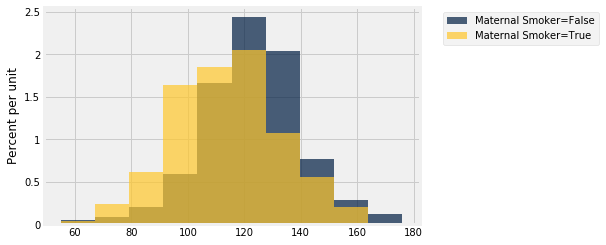

In [34]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [36]:
means = smoking_and_birthweight.group('Maternal Smoker', np.mean)
means

Maternal Smoker,Birth Weight mean
False,123.085
True,113.819


In [37]:
mw = means.column(1)
mw.item(0) - mw.item(1)

9.266142572024918

In [38]:
shuffled_weights = smoking_and_birthweight.sample(with_replacement = False).column(1)
shuffled_weights

array([114, 112, 115, ..., 100, 117, 128])

In [40]:
both = smoking_and_birthweight.with_column('Shuffled Birth Weight', shuffled_weights)
both

Maternal Smoker,Birth Weight,Shuffled Birth Weight
False,120,114
False,113,112
True,128,115
True,108,121
False,136,150
False,138,105
False,132,132
False,120,113
True,143,141
False,140,115


In [45]:
both.group('Maternal Smoker', np.mean)

Maternal Smoker,Birth Weight mean,Shuffled Birth Weight mean
False,123.085,119.866
True,113.819,118.834


In [41]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    
    shuffled_weights = smoking_and_birthweight.sample(with_replacement = False).column(1)
    original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Birth Weight', shuffled_weights)

    shuffled_means = original_and_shuffled.group('Maternal Smoker', np.average).column(2)
    simulated_difference = shuffled_means.item(1) - shuffled_means.item(0)
    
    differences = np.append(differences, simulated_difference)
    
differences

array([-0.4303335 , -0.29082073, -0.15846245, ...,  2.10951445,
        0.77519996, -0.01894968])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


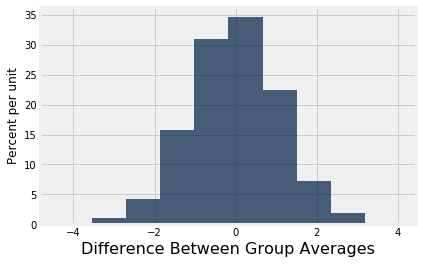

In [42]:
Table().with_column('Difference Between Group Averages', differences).hist()


## Deflategate

From the [Wells Report](https://www.washingtonpost.com/apps/g/page/sports/deflategate-the-full-ted-wells-report/1687/):

> On January 18, 2015, the New England Patriots and Indianapolis Colts played in the AFC Championship Game at Gillette Stadium in Foxborough, Massachusetts to determine which team would advance to Super Bowl XLIX. During the first half of the game, a question was raised by the Colts concerning the inflation level of the footballs being used by the Patriots. As a result, at halftime, members of the officiating crew assigned to the game, overseen by a senior officiating supervisor from the National Football League (the “NFL” or the “League”), tested the air pressure of footballs being used by each of the Patriots and the Colts. All eleven of the Patriots game balls tested measured below the minimum pressure level of 12.5 pounds per square inch (“psi”) allowed by Rule 2 of the Official Playing Rules of the National Football League (the “Playing Rules”) on both of two air pressure gauges used to test the balls. The four Colts balls tested each measured within the 12.5 to 13.5 psi range permitted under the Playing Rules on at least one of the gauges used for the tests

In [46]:
football = Table.read_table('deflategate.csv')
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


In [47]:
football = football.drop(1, 2).with_column(
    'Combined', (football.column(1)+football.column(2))/2
    )
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


In [49]:
12.5*np.ones(11)

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5])

In [50]:
start = np.append(12.5*np.ones(11), 13*np.ones(4))
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [52]:
football = football.with_column("Start",start)
football

Team,Combined,Start
Patriots,11.65,12.5
Patriots,11.025,12.5
Patriots,11.325,12.5
Patriots,10.85,12.5
Patriots,11.275,12.5
Patriots,11.775,12.5
Patriots,12.075,12.5
Patriots,11.325,12.5
Patriots,11.15,12.5
Patriots,10.7,12.5


In [55]:
football = football.with_column('Drop', football.column(2)-football.column(1))
football

Team,Combined,Start,Drop
Patriots,11.65,12.5,0.85
Patriots,11.025,12.5,1.475
Patriots,11.325,12.5,1.175
Patriots,10.85,12.5,1.65
Patriots,11.275,12.5,1.225
Patriots,11.775,12.5,0.725
Patriots,12.075,12.5,0.425
Patriots,11.325,12.5,1.175
Patriots,11.15,12.5,1.35
Patriots,10.7,12.5,1.8


In [57]:
football.group('Team', np.mean)

Team,Combined mean,Start mean,Drop mean
Colts,12.5312,13,0.46875
Patriots,11.2977,12.5,1.20227


In [60]:
drops = football.drop([1,2])
drops

Team,Drop
Patriots,0.85
Patriots,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Patriots,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


In [62]:
diffs = make_array()

repetitions = 50
for i in np.arange(repetitions):
    
    shuffled_drops = drops.sample(with_replacement = False).column(1) 
    original_and_shuffled = drops.with_column('Shuffled Drops', shuffled_drops)

    shuffled_means = original_and_shuffled.group('Team', np.average).column(2)
    simulated_difference = shuffled_means.item(1) - shuffled_means.item(0)
    
    diffs = np.append(diffs, simulated_difference)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


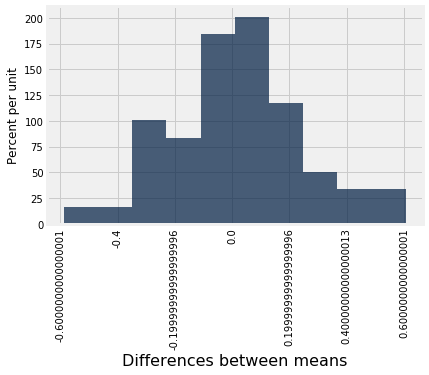

In [66]:
Table().with_column('Differences between means', diffs).hist()

## Causality
Consider the the effect of using Botulinum Toxin A as a treatment for lower back pain. Thirty one patients with low-back pain were randomized into treatment and control groups, with 15 given Botulinum Toxin A as *treatment* and 16 in given Saline as *control*. 

In [ ]:
bta = Table.read_table('bta.csv')
bta.show()